# EDA and Baseline Model for Hit-Predict Project

Resume what we did in the preprocessing notebook...

## Importing Libraries

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import zscore

## Loading and Exploring Data

In [ ]:
DATA_PATH = "../data/processed_spotify_songs.csv"
df = pd.read_csv(DATA_PATH)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,edm,r&b,pop,latin,artist_track_encoded,playlist_id_encoded,track_album_id_encoded,release_year,release_month,release_day
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,...,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,26671.000000,26671.000000,26671.000000
mean,39.335320,0.463788,0.521398,5.367417,0.699150,0.565533,0.453648,0.449806,0.175032,0.544491,...,0.195295,0.181222,0.181010,0.163622,39.335320,39.335320,39.335320,2012.103146,6.418057,14.198268
std,23.699443,0.188308,0.238359,3.613743,0.099062,0.495696,0.127350,0.248615,0.289067,0.131413,...,0.396435,0.385209,0.385033,0.369938,17.499857,14.908984,23.415735,10.246982,3.735432,9.434473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.548387,0.000000,1957.000000,1.000000,1.000000
25%,21.000000,0.325701,0.335241,2.000000,0.645094,0.000000,0.354797,0.243211,0.000000,0.453020,...,0.000000,0.000000,0.000000,0.000000,28.000000,28.983051,21.888889,2010.000000,3.000000,6.000000
50%,42.000000,0.464561,0.521284,6.000000,0.714462,1.000000,0.408549,0.431212,0.027490,0.503325,...,0.000000,0.000000,0.000000,0.000000,40.666667,38.696970,43.000000,2016.000000,7.000000,14.000000
75%,58.000000,0.597751,0.710649,9.000000,0.769362,1.000000,0.525214,0.639532,0.187693,0.629961,...,0.000000,0.000000,0.000000,0.000000,52.000000,50.740260,58.000000,2019.000000,10.000000,22.000000
max,100.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,97.000000,79.195652,100.000000,2020.000000,12.000000,31.000000


## Exploratory Data Analysis and Visualization

### Exploration of Variables

Stuff to do from previous hws (add more from labs?):

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices. 

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

### Distribution of Target Variable (Popularity)

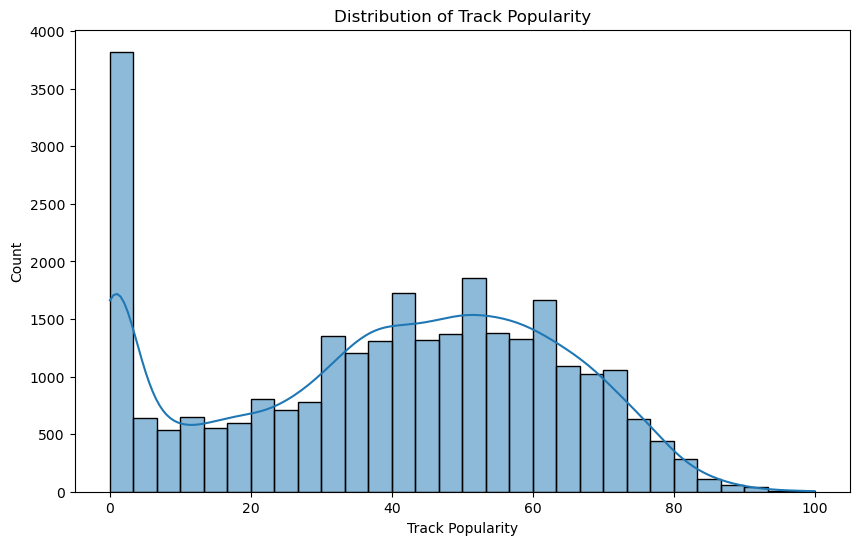

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

#### Dealing with the 0 values in the target variable
a. Replacing 0 values with the artist popularity value (which is the mean popularity of all the songs of that artist)

b. Removing the rows with 0 popularity

c. Not doing anything

### Distribution of the other Variables

### Plotting the different potential predictors against the target variable

In [ ]:
# Comme dans hw4 avec la grid

### Descriptive Statistics for Key Features

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,28352.0,39.335320,23.699443,0.000000,21.000000,42.000000,58.000000,100.000000
danceability,28352.0,0.463788,0.188308,0.000000,0.325701,0.464561,0.597751,1.000000
energy,28352.0,0.521398,0.238359,0.000000,0.335241,0.521284,0.710649,1.000000
key,28352.0,5.367417,3.613743,0.000000,2.000000,6.000000,9.000000,11.000000
loudness,28352.0,0.699150,0.099062,0.000000,0.645094,0.714462,0.769362,1.000000
mode,28352.0,0.565533,0.495696,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,28352.0,0.453648,0.127350,0.000000,0.354797,0.408549,0.525214,1.000000
acousticness,28352.0,0.449806,0.248615,0.000000,0.243211,0.431212,0.639532,1.000000
instrumentalness,28352.0,0.175032,0.289067,0.000000,0.000000,0.027490,0.187693,1.000000
liveness,28352.0,0.544491,0.131413,0.000000,0.453020,0.503325,0.629961,1.000000


### Correlation between features

In [10]:
# heatmap ?

### Outlier Analysis

In [12]:
outliers = df[(np.abs(zscore(df[['loudness', 'danceability', 'energy', 'acousticness']])) > 3).any(axis=1)]
print("Number of outliers:", len(outliers))

Number of outliers: 238


In [13]:
# Dealing with outliers?

## Baseline Models

### Predicting the maximum class the target variable

In [14]:
# Like in HW4

### Linear Regression

### K-NN Classifier

In [ ]:
# See HW2 for good steps on how to proceed

### Previous models?

### Comparison according to how the target variable's 0 values were handled

put a table there comparing the model performances

### Implementation Plan

1. Experiment with different feature engineering techniques, such as polynomial features or interactions.
2. Test additional models, including decision trees, random forests, and neural networks.
3. Tune hyperparameters for optimal model performance.
4. Evaluate models on RMSE and other metrics, iteratively improving results.
5. Discussion about the initial choice on how the 0 values in the target variable were handled. In the scenario where we just removed them, predicting the popularity of such songs using our final model and discussing the results.